In [111]:
import sys
sys.path.append("../src")
import time_series
import brownian
from importlib import reload
reload(brownian)
reload(time_series)


from time_series import Collection, TimeSeries, find_ders, find_files

import matplotlib.pyplot as plt
import numpy as np
from nptdms import TdmsFile
import os
from copy import copy
from time import time
%matplotlib inline


In [128]:
# Make some fake time series data
size = 2**14  # number of points
r = 25e6  # sample rate
f = 75e3  # signal frequency
x = np.random.randn(size) + 1*np.sin(2*np.pi*f * np.arange(size)/r)
timeseries = TimeSeries(x, r=r)

## Bin averaging raw data

cutoff=12.5 MHz, Npts = 1
    Automatically updated:
       size: 16384, sampling rate: 25.0 MHz
    Expected:
       size: 16384.0, sampling rate: 25.0 MHz
cutoff=1.0 MHz, Npts = 12
    Automatically updated:
       size: 1365, sampling rate: 2.0833333333333335 MHz
    Expected:
       size: 1365.3333333333333, sampling rate: 2.083333 MHz
cutoff=0.2 MHz, Npts = 62
    Automatically updated:
       size: 264, sampling rate: 0.40322580645161293 MHz
    Expected:
       size: 264.258064516129, sampling rate: 0.403225 MHz


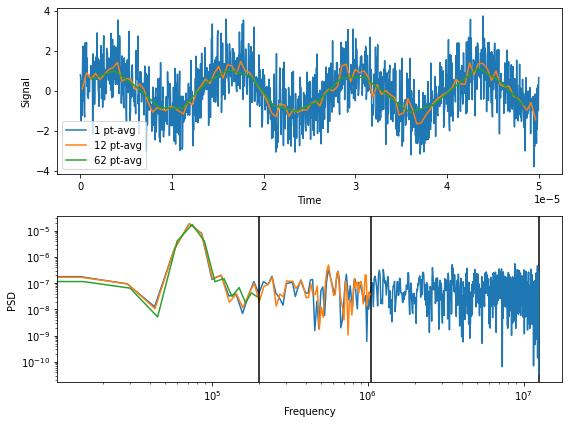

In [134]:
fig, (ax0, ax1) =  plt.subplots(2,1, figsize=(8,6))
for cutoff in [200e3, 1e6, 12.5e6][::-1]:
    timeseries.restore()
    Npts = int(timeseries.r/(2*cutoff))
    print(f"cutoff={cutoff/1e6} MHz, Npts = {Npts}")
    timeseries.bin_average(Npts=Npts, inplace=True)
    timeseries.plot(ax=ax0, tmin=0, tmax=5e-5, label=f"{Npts} pt-avg")
    timeseries.PSD(tmin=400e-6, tmax=470e-6)
    ax1.axvline(r/(Npts*2), c="k") # expected cut off
    ax1.loglog(timeseries.freq, timeseries.psd)
    
    print("    Automatically updated:")
    print(f"       size: {timeseries.size}, sampling rate: {timeseries.r/1e6} MHz")
    print("    Expected:")
    print(f"       size: {size/Npts}, sampling rate: {r//(Npts)/1e6} MHz")
ax0.legend()
ax0.set_xlabel("Time")
ax0.set_ylabel("Signal")

ax1.set_xlabel("Frequency")
ax1.set_ylabel("PSD")
plt.tight_layout()